# SDL Project
By Kartik Rao      18070122031
   Safeer Khan     18070122031
   Priyanshu Meena 18070122031

# Image Compression

# K Means Algorithm

## K Means in General

## K Means Applied to Image compression

We will be using the Inbuilt KMeans function provided by the ScikitLearn Library

In [1]:
#Importing necessary Libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from time import time
plt.rcParams['figure.figsize'] = 10,8
from sklearn.cluster import KMeans 
from skimage import io

We will import the image

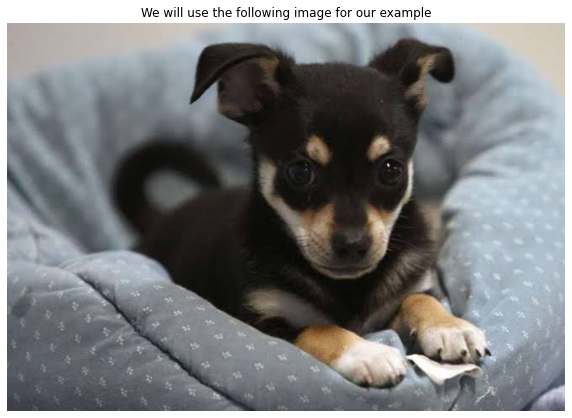

In [3]:
url = 'https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcTzLzdD4MoAPP3I_JjrxndAqKg1zXtEnaODwsHbH6il9BL3Qt61'
img_original = io.imread(url)
plt.axis('off')
plt.imshow(img_original)
plt.title('We will use the following image for our example')
plt.show()

### Preprocessing the image

In [7]:
img = np.array(img_original,dtype=float) / 255

# Save the dimensions, we will be need them later
w, h, d = original_shape = img.shape
print('Original Shape'.center(20,'='))
print(img.shape)

# image_array size - w*h , d
image_array = img.reshape(-1,d)
print('ReShaped'.center(20,'='))
print(image_array.shape)

===Original Shape===
(462, 664, 3)
======ReShaped======
(306768, 3)


In [9]:
num_clusters=16

In [16]:
kmeans = KMeans(n_clusters = num_clusters,random_state=42,verbose=2,n_jobs=-1).fit(image_array)
labels = kmeans.labels_

C:\Users\safee\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


Initialization complete
Iteration 0, inertia 857.9004229142517
Iteration 1, inertia 701.0196535289383
Iteration 2, inertia 679.906006895808
Iteration 3, inertia 670.4274965050535
Iteration 4, inertia 665.3598182489973
Iteration 5, inertia 661.6346577350204
Iteration 6, inertia 658.8593296226097
Iteration 7, inertia 656.6419812090279
Iteration 8, inertia 655.2880159523057
Iteration 9, inertia 654.0820895294925
Iteration 10, inertia 653.0180513077082
Iteration 11, inertia 652.0011097454101
Iteration 12, inertia 651.2560057686269
Iteration 13, inertia 650.71305137161
Iteration 14, inertia 650.3094233275373
Iteration 15, inertia 649.8087810547286
Iteration 16, inertia 649.3508821509778
Iteration 17, inertia 649.0743280812158
Iteration 18, inertia 648.8402513968649
Converged at iteration 18: center shift 4.547265730042432e-06 within tolerance 5.994688738309841e-06.
Initialization complete
Iteration 0, inertia 937.9094040753324
Iteration 1, inertia 758.9622312100119
Iteration 2, inertia 735.

Iteration 11, inertia 673.5636367490539
Iteration 12, inertia 673.1217015646955
Iteration 13, inertia 672.6650800311166
Iteration 14, inertia 672.2528582207598
Iteration 15, inertia 671.7250058918926
Iteration 16, inertia 671.309950132945
Iteration 17, inertia 671.0128181985225
Iteration 18, inertia 670.4454206311312
Iteration 19, inertia 669.9798710424993
Iteration 20, inertia 669.5945354072334
Iteration 21, inertia 669.0584250287463
Iteration 22, inertia 668.4165933671844
Iteration 23, inertia 667.9057196462873
Iteration 24, inertia 667.4842571993037
Iteration 25, inertia 667.2637753052887
Iteration 26, inertia 666.9439976495651
Iteration 27, inertia 666.5605968536745
Iteration 28, inertia 666.2203334372675
Iteration 29, inertia 665.8082410835967
Iteration 30, inertia 665.5469395852907
Iteration 31, inertia 665.1705495625196
Iteration 32, inertia 664.8394972316099
Converged at iteration 32: center shift 4.710241932722561e-06 within tolerance 5.994688738309841e-06.


In [17]:
def recreate_image(centroids, labels, w, h):
    # centroids variable are calculated from the flattened image
    # centroids: w*h, d 
    # so each row depicts the values per depth
    d = centroids.shape[1]
    image = np.zeros((w, h, d))
    label_idx = 0
    for i in range(w):
        for j in range(h):
            # filling values in new image with centroid values
            image[i][j] = centroids[labels[label_idx]]
            label_idx += 1
    return image

 ### Result

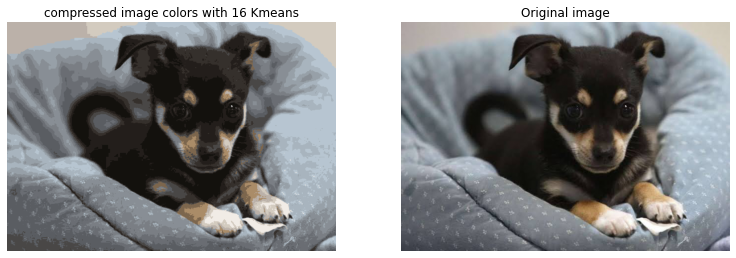

In [21]:
plt.figure(figsize=(20,10))
plt.subplot(132)
plt.axis('off')
plt.title('Original image')
plt.imshow(img)

plt.subplot(131)
plt.axis('off')
title = "compressed image colors with "+str(num_clusters)+" Kmeans"
plt.title(title)
plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))
plt.show()

# Principle Component Analysis

## K Means Applied to Image compression

In [22]:
# IMPORT NECESSARY LIBRARIES
import matplotlib
import scipy
import scipy.ndimage
import matplotlib.pyplot as plt 
import numpy as np 
from PIL import Image
import scipy.misc

In [26]:
# IMPORTING IMAGE USING SCIPY AND TAKING R,G,B COMPONENTS
url = 'https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcTzLzdD4MoAPP3I_JjrxndAqKg1zXtEnaODwsHbH6il9BL3Qt61'
img_original = io.imread(url)
a_np = np.array(img_original)
a_r = a_np[:,:,0]
a_g = a_np[:,:,1]
a_b = a_np[:,:,2]

In [35]:
numpc = 100 # THIS IS NUMBER OF PRINCIPAL COMPONENTS, YOU CAN CHANGE IT AND SEE RESULTS

In [36]:
def comp_2d(image_2d): # FUNCTION FOR RECONSTRUCTING 2D MATRIX USING PCA
    cov_mat = image_2d - np.mean(image_2d , axis = 0).T
    eig_val, eig_vec = np.linalg.eigh(np.cov(cov_mat)) # USING "eigh", SO THAT PROPRTIES OF HERMITIAN MATRIX CAN BE USED
    p = np.size(eig_vec, axis =1)
    idx = np.argsort(eig_val)
    idx = idx[::-1]
    eig_vec = eig_vec[:,idx]
    eig_val = eig_val[idx]
    if numpc <p or numpc >0:
        eig_vec = eig_vec[:, range(numpc)]
    score = np.dot(eig_vec.T, cov_mat)
    recon = np.dot(eig_vec, score) + np.mean(image_2d, axis = 0).T # SOME NORMALIZATION CAN BE USED TO MAKE IMAGE QUALITY BETTER
    recon_img_mat = np.uint8(np.absolute(recon)) # TO CONTROL COMPLEX EIGENVALUES
    return recon_img_mat

In [37]:
a_r_recon, a_g_recon, a_b_recon = comp_2d(a_r), comp_2d(a_g), comp_2d(a_b) # RECONSTRUCTING R,G,B COMPONENTS SEPARATELY
red_temp = Image.fromarray(a_r_recon)
red_temp = Image.fromarray(a_g_recon)
blue_temp = Image.fromarray(a_b_recon)
recon_color_img = np.dstack((a_r_recon, a_g_recon, a_b_recon)) # COMBINING R.G,B COMPONENTS TO PRODUCE COLOR IMAGE
recon_color_img = Image.fromarray(recon_color_img)
recon_color_img.show()
recon_color_img.save('new.jpg')

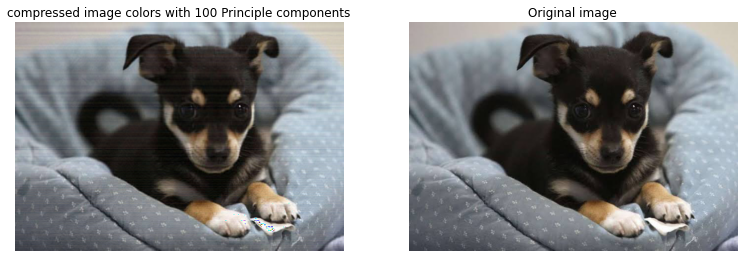

In [38]:
plt.figure(figsize=(20,10))
plt.subplot(132)
plt.axis('off')
plt.title('Original image')
plt.imshow(img_original)

plt.subplot(131)
plt.axis('off')
title = "compressed image colors with "+str(numpc)+" Principle components"
plt.title(title)
plt.imshow(recon_color_img)
plt.show()